In [2]:
#import sklearn
from sklearn.datasets import load_boston
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_boston = load_boston()
column_name = data_boston.feature_names
df_boston = pd.DataFrame(data_boston.data)
df_boston.columns = column_name
df_boston.head()
#data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data_boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [7]:
df_boston['MEDV']=data_boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
x = df_boston.drop('MEDV',axis = 1)
y = df_boston['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
print(x_train.shape,x_test.shape)

(354, 13) (152, 13)


In [9]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


In [10]:
y_train.head()
#y_train.drop([141])

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
Name: MEDV, dtype: float64

In [11]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [12]:
print(x_train.index[155])

414


<h1> check for null values</h1>

    From the data below we can infer that no null values exist in the dataset

In [13]:
x_train.isna().sum() #no null values present
#df_boston.index

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

<h1>check for duplicate values</h1>


    As we can see in the below printed output no duplicate values exist in the dataset

In [14]:
duplicate_vals = x_train.duplicated()
print(duplicate_vals.sum()) 

0


<h1> The histograms for the dataset </h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6BBB70910>,
      dtype=object)

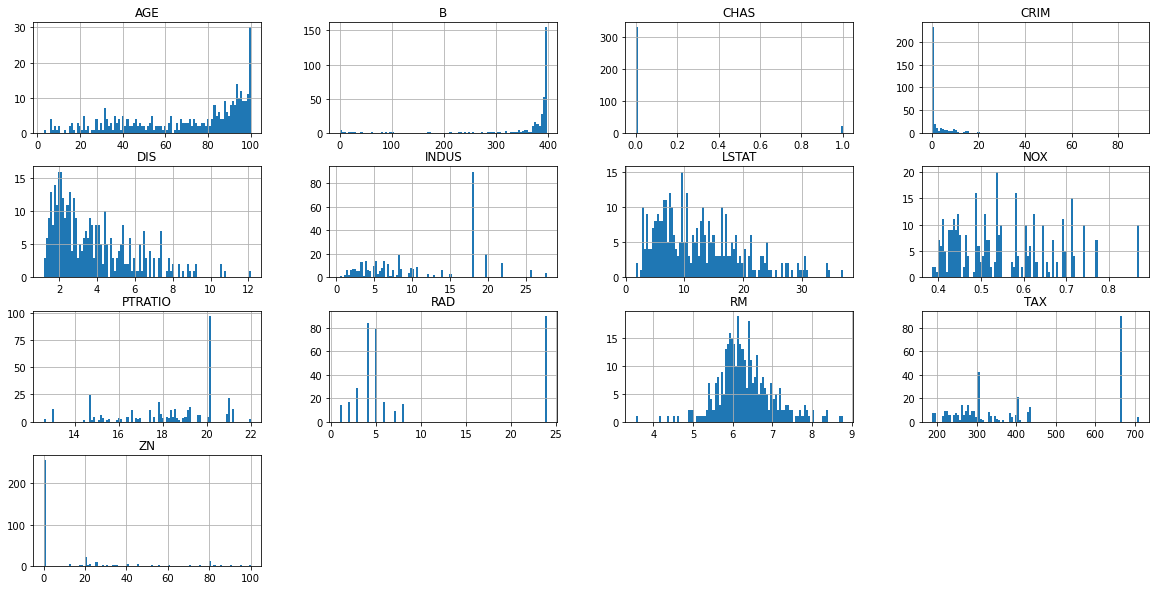

In [15]:
x_train.hist(bins=100,figsize=(20,10))

<h1>Boxplots of all the columns to identify the outliers</h1>

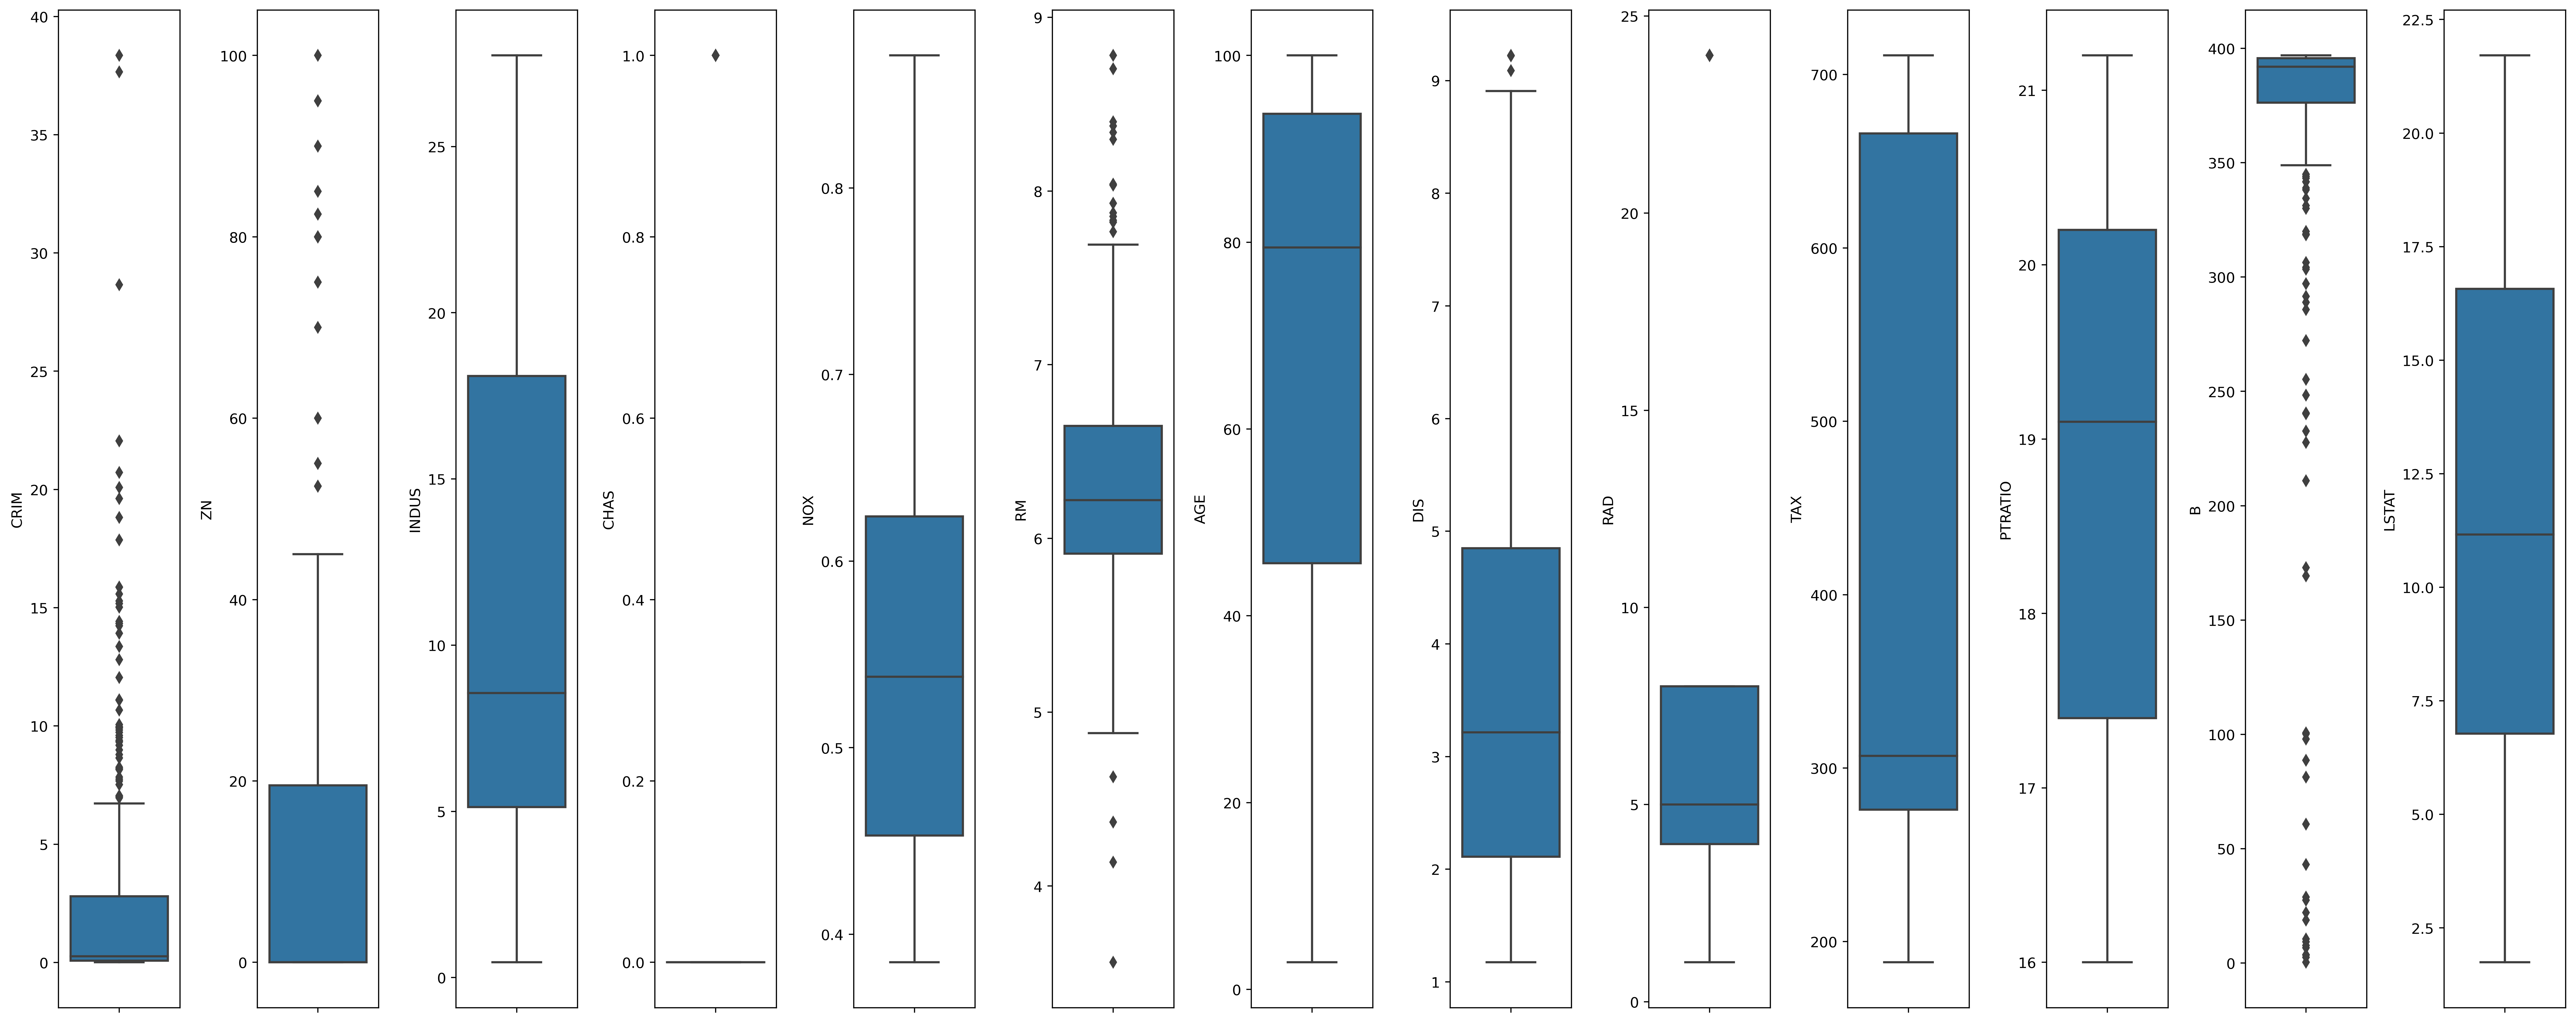

In [71]:
fig,ax=plt.subplots(ncols=13,nrows=1,figsize=(25,10),dpi=400)
i=0

for column in x_train.columns:

    sns.boxplot(data=x_train,y=column,ax=ax[i])
    i=i+1
    
plt.tight_layout()

In [17]:
def remove_outliers(col):
    sorted(col)
    quant1,quant2 = col.quantile([0.25,0.75])
    iqr = quant2-quant1
    lowerrange = quant2-(1.5*iqr)
    upperrange = quant1+(1.5*iqr)
    print(lowerrange,upperrange)
    return lowerrange,upperrange

In [18]:
low,high = remove_outliers(x_train['PTRATIO'])
for i in x_train.index:
    if(x_train['PTRATIO'][i]>high): 
        x_train["PTRATIO"][i]=high
    if(x_train["PTRATIO"][i]<low):
        x_train["PTRATIO"][i]=low
        
for i in x_test.index:
    if(x_test['PTRATIO'][i]>high):
        x_test['PTRATIO'][i]=high
    if(x_test['PTRATIO'][i]<low):
        x_test['PTRATIO'][i]=low

15.999999999999998 21.6


In [19]:
low,high = remove_outliers(x_train['LSTAT'])
for i in x_train.index:
    if(x_train['LSTAT'][i]>high): 
        x_train["LSTAT"][i]=high
    if(x_train["LSTAT"][i]<low):
        x_train["LSTAT"][i]=low
        
for i in x_test.index:
    if(x_test['LSTAT'][i]>high):
        x_test['LSTAT'][i]=high
    if(x_test['LSTAT'][i]<low):
        x_test['LSTAT'][i]=low

1.7437499999999986 21.708750000000002


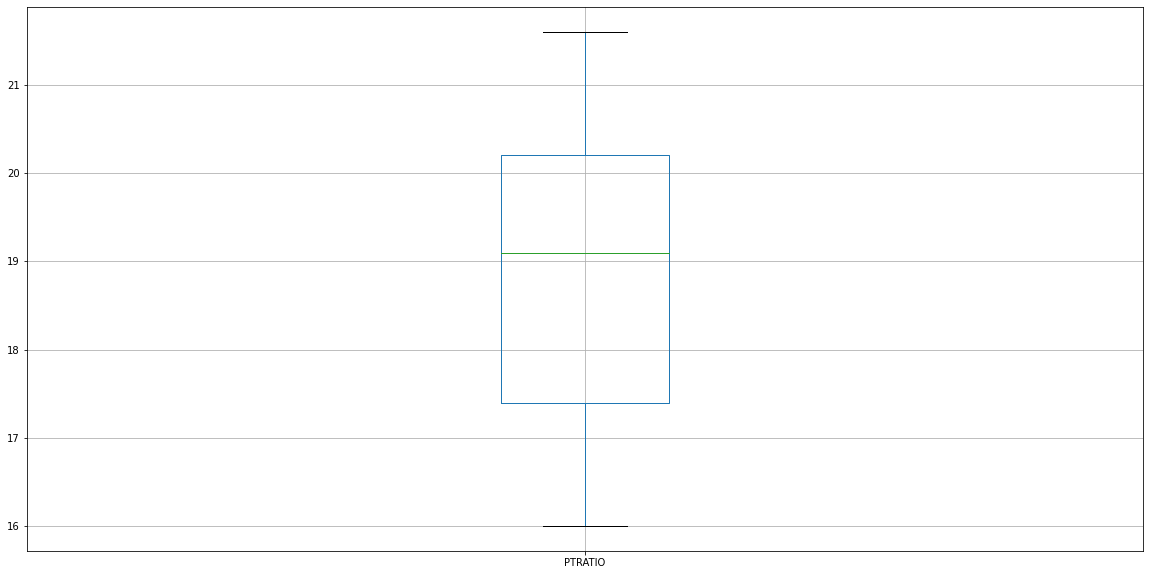

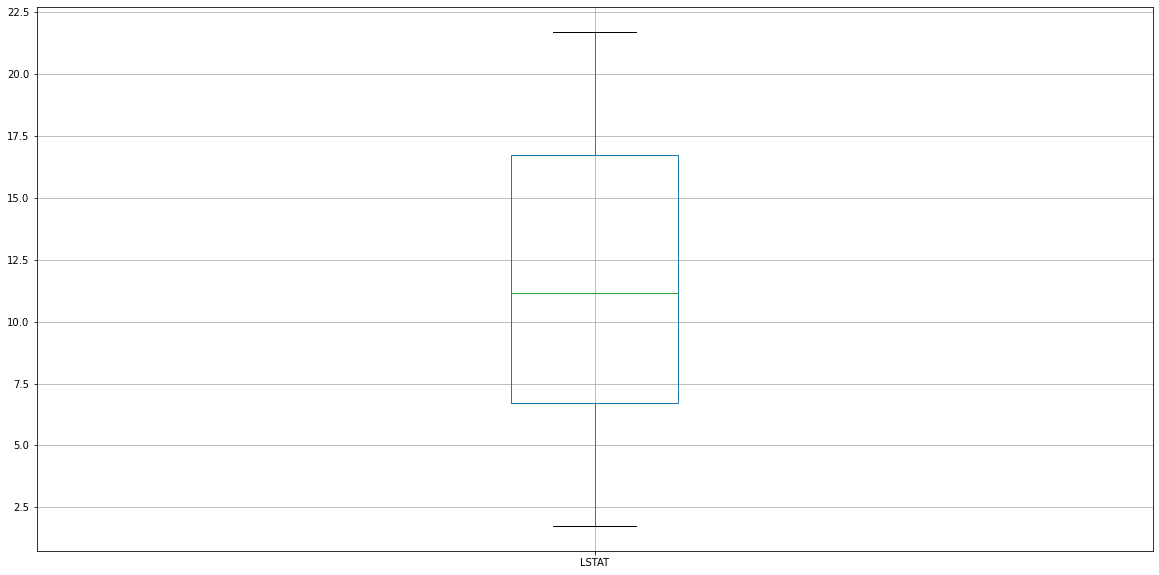

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [20]:
plt.figure(figsize=(20,10))
x_train.boxplot(column=['PTRATIO'])
plt.show()
plt.figure(figsize=(20,10))
x_train.boxplot(column=['LSTAT'])
plt.show()
plt.figure(figsize=(20,10))

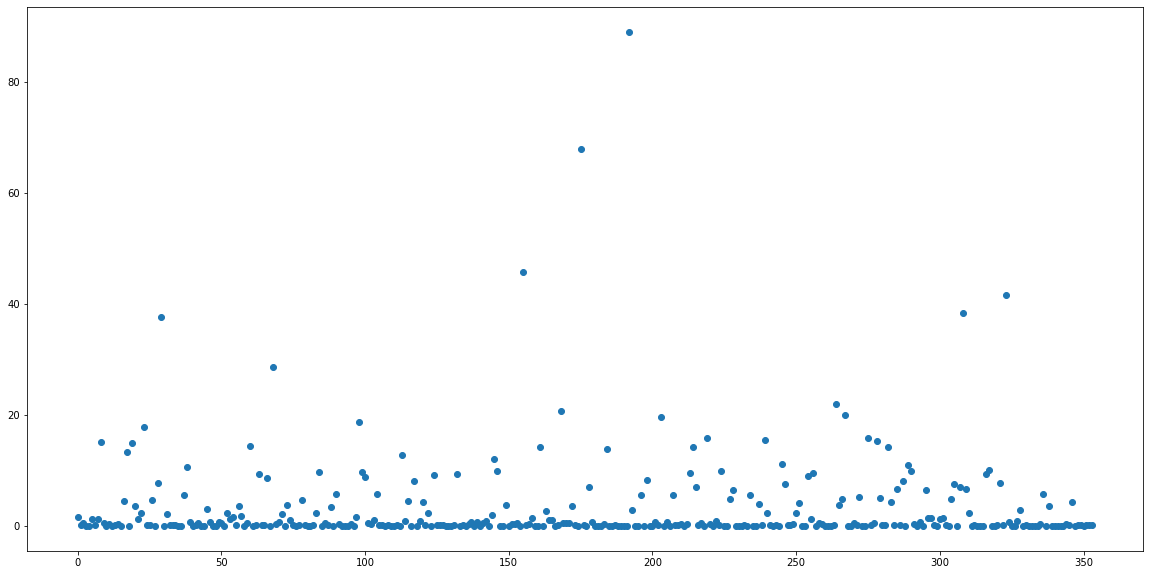

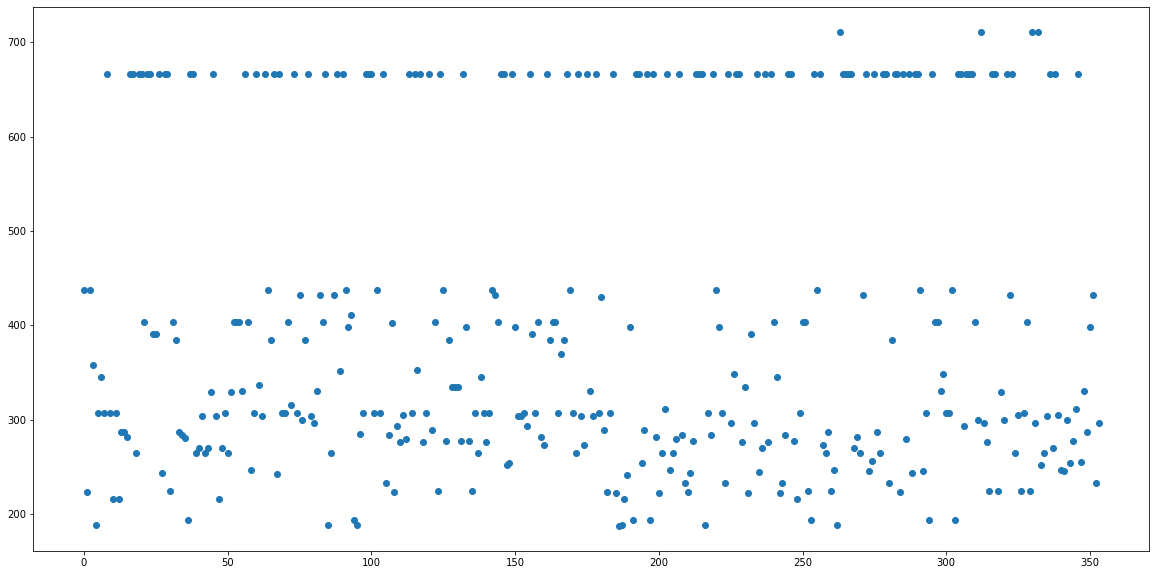

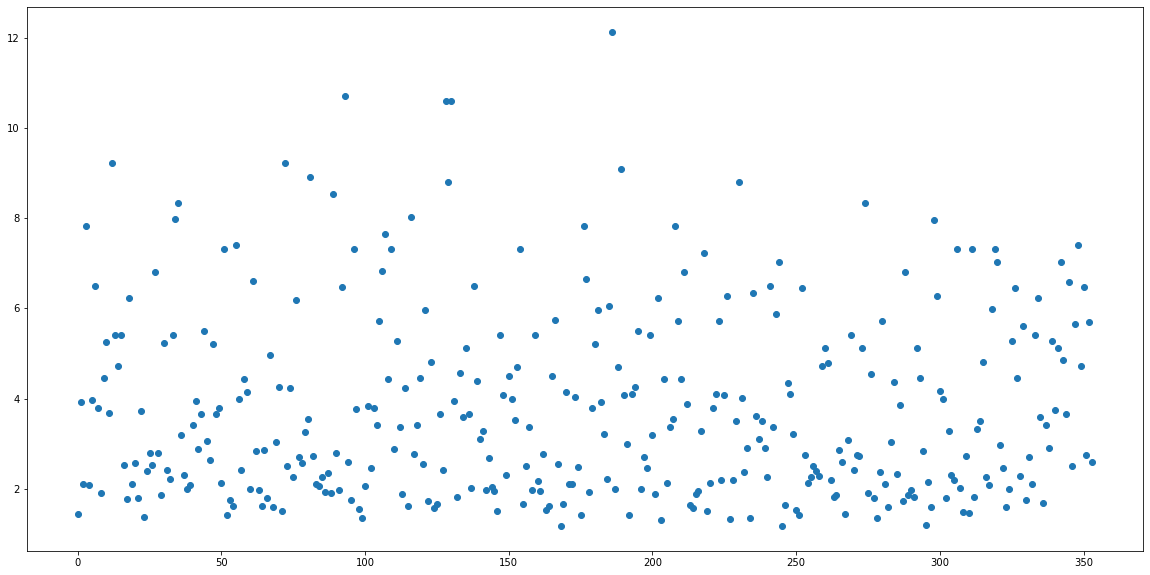

In [21]:
vals=[0]*x_train.shape[0]
for i in range(len(vals)):
    vals[i] = i
plt.figure(figsize=(20,10))
plt.scatter(x=vals,y=x_train['CRIM'])
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=vals,y=x_train['TAX'])
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=vals,y=x_train['DIS'])
plt.show()

In [22]:
rows_to_drop = np.where(x_train['CRIM']>40)
row_indices_to_drop = [0]*len(rows_to_drop[0])
for i in range(0,len(rows_to_drop[0])):
    row_indices_to_drop[i] = x_train.index[rows_to_drop[0][i]]
print(len(rows_to_drop[0]))
print(x_train.shape,y_train.shape)
x_train=x_train.drop(row_indices_to_drop)
y_train = y_train.drop(row_indices_to_drop)
print(x_train.shape,y_train.shape)

4
(354, 13) (354,)
(350, 13) (350,)


In [23]:
rows_to_drop = np.where(x_train['DIS']>10)
row_indices_to_drop = [0]*len(rows_to_drop[0])
for i in range(0,len(rows_to_drop[0])):
    row_indices_to_drop[i] = x_train.index[rows_to_drop[0][i]]
print(len(rows_to_drop[0]))
print(x_train.shape,y_train.shape)
x_train=x_train.drop(row_indices_to_drop)
y_train = y_train.drop(row_indices_to_drop)
print(x_train.shape,y_train.shape)

4
(350, 13) (350,)
(346, 13) (346,)


In [24]:
rows_to_drop = np.where(x_test['DIS']>10)
row_indices_to_drop = [0]*len(rows_to_drop[0])
for i in range(0,len(rows_to_drop[0])):
    row_indices_to_drop[i] = x_test.index[rows_to_drop[0][i]]
print(len(rows_to_drop[0]))
print(x_test.shape,y_test.shape)
x_test=x_test.drop(row_indices_to_drop)
y_test = y_test.drop(row_indices_to_drop)
print(x_test.shape,y_test.shape)

1
(152, 13) (152,)
(151, 13) (151,)


In [25]:
rows_to_drop = np.where(x_test['CRIM']>40)
row_indices_to_drop = [0]*len(rows_to_drop[0])
for i in range(0,len(rows_to_drop[0])):
    row_indices_to_drop[i] = x_test.index[rows_to_drop[0][i]]
print(len(rows_to_drop[0]))
print(x_test.shape,y_test.shape)
x_test=x_test.drop(row_indices_to_drop)
y_test = y_test.drop(row_indices_to_drop)
print(x_test.shape,y_test.shape)

2
(151, 13) (151,)
(149, 13) (149,)


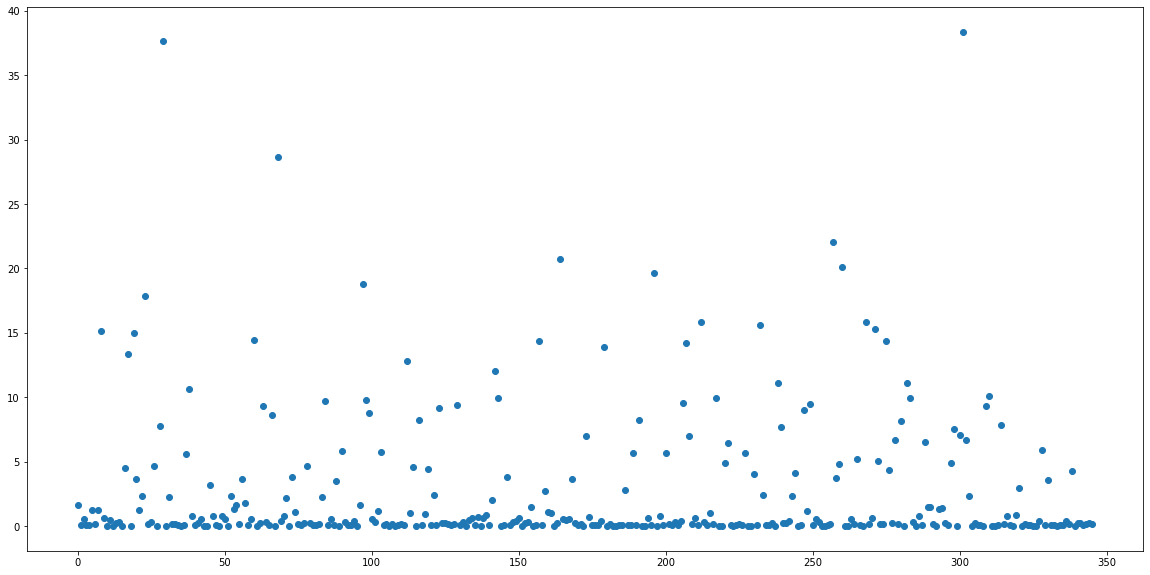

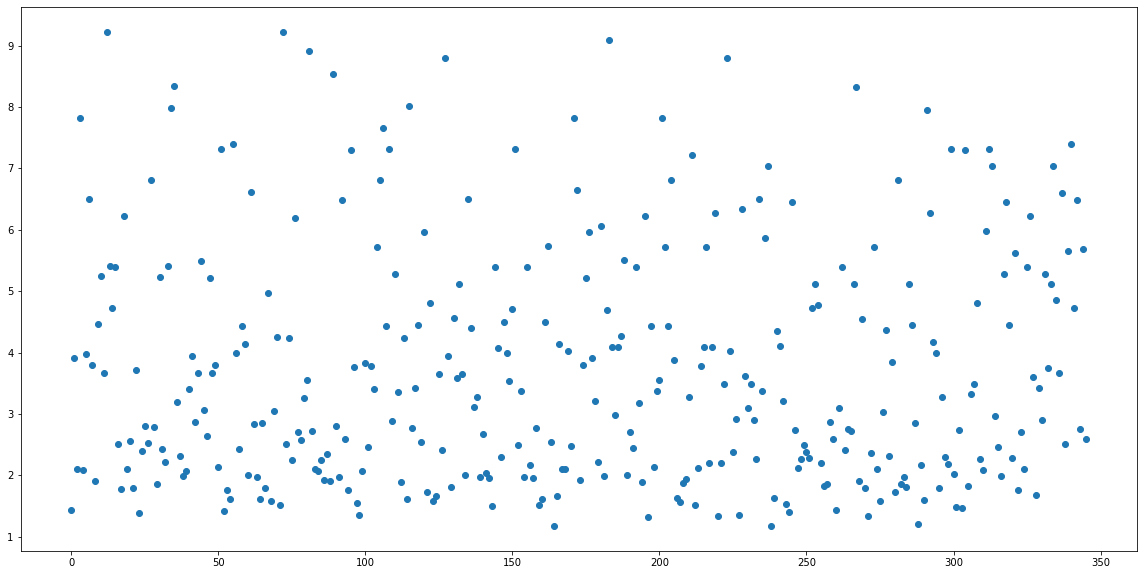

In [26]:
vals=[0]*x_train.shape[0]
for i in range(len(vals)):
    vals[i] = i
plt.figure(figsize=(20,10))
plt.scatter(x=vals,y=x_train['CRIM'])
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(x=vals,y=x_train['DIS'])
plt.show()

In [27]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,2.729521,11.186416,11.103902,0.066474,0.556248,6.316694,69.171098,3.704609,9.242775,399.713873,18.699133,361.095780,11.855954
std,5.301979,22.782127,6.963825,0.249470,0.115024,0.698867,27.868220,1.923625,8.610679,169.712414,1.749724,85.284695,5.866743
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,188.000000,16.000000,0.320000,1.743750
25%,0.073425,0.000000,5.130000,0.000000,0.453000,5.913250,45.625000,2.111050,4.000000,276.000000,17.400000,376.247500,6.777500
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.221000,79.450000,3.215700,5.000000,307.000000,19.100000,392.015000,11.160000
75%,2.797277,19.500000,18.100000,0.000000,0.624000,6.647250,93.750000,4.850150,8.000000,666.000000,20.200000,395.735000,16.570000
max,38.351800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,21.708750


In [28]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_train)
df_norm = pd.DataFrame(x_norm,columns=x_train.columns)
df_norm.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.071018,0.111864,0.390172,0.066474,0.352362,0.528012,0.682504,0.314387,0.358382,0.404807,0.519064,0.909718,0.506497
std,0.138269,0.227821,0.255272,0.249470,0.236675,0.133908,0.287005,0.238998,0.374377,0.324498,0.336485,0.215050,0.293851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001750,0.000000,0.171188,0.000000,0.139918,0.450709,0.440010,0.116398,0.130435,0.168260,0.269231,0.947923,0.252129
50%,0.006685,0.000000,0.296921,0.000000,0.314815,0.509676,0.788363,0.253643,0.173913,0.227533,0.596154,0.987682,0.471638
75%,0.072785,0.195000,0.646628,0.000000,0.491770,0.591349,0.935633,0.456714,0.304348,0.913958,0.807692,0.997062,0.742612
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
x_norm.shape

(346, 13)

In [30]:
def compute_cost(X,y,w,b):
    total_cost=0
    f_wb=np.dot(X,w)+b
    cost=0
    #print(f_wb[1])
    #cost=np.dot(f_wb-y,f_wb-y)
    for i in range(0,len(f_wb)):
        cost+=(f_wb[i]-y[i])**2
    total_cost = cost/(2*m)
    return total_cost;

In [62]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_db = 0
    dj_dw = np.zeros(n)
    f_wb = np.dot(X,w)+b
    dj_dw = np.dot(f_wb-y,X)
    dj_db = np.sum(f_wb-y)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [63]:
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.042308,0.0,0.785557,0.0,0.491770,0.279364,1.000000,0.032949,0.130435,0.476099,1.000000,1.000000,1.000000
1,0.002824,0.2,0.238270,0.0,0.162551,0.570416,0.574665,0.340838,0.086957,0.066922,0.500000,0.995108,0.299837
2,0.014381,0.0,0.785557,0.0,0.491770,0.531519,0.981462,0.116354,0.130435,0.476099,1.000000,0.994377,0.762146
3,0.001521,0.7,0.065249,0.0,0.030864,0.533436,0.177137,0.826668,0.173913,0.325048,0.000000,0.927732,0.161595
4,0.002260,0.0,0.923387,0.0,0.403292,0.459858,0.926880,0.113397,0.043478,0.000000,0.596154,0.952569,0.810731


In [64]:
X_train=x_train.values
Y_train = y_train.values
X_test = x_test.values
Y_test = y_test.values
print(X_train.shape,Y_train.shape,x_test.shape,y_test.shape)

(346, 13) (346,) (149, 13) (149,)


In [65]:
m,n=x_norm.shape
w = np.zeros(n)
b=0
print(compute_cost(x_norm,Y_train,w,b))
tempdj_dw,tempdj_db = compute_gradient(x_norm,Y_train,w,b)
print(tempdj_db,tempdj_dw)

304.41349710982655
-22.91329479768786 [ -1.09241342  -3.39745665  -7.77030432  -1.88901734  -7.16821178
 -12.96790446 -14.62152658  -7.74112396  -6.94200804  -7.89323545
 -10.20662517 -21.47482701  -9.50251186]


In [52]:
def gradient_descent(x,y,w,b,num_iters,cost_function,compute_gradient,alpha):
    m,n = x.shape
    w_history = []
    J_history=[]
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        temp=np.zeros(n)
        for j in range(n):
            temp[j] = w[j] - alpha * dj_dw[j]
        w = temp
        b = b-alpha * dj_db
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print('iternation',i,'cost'+':',cost_function(x,y,w,b))
    return w, b, J_history, w_history 

In [53]:
initial_w = np.zeros(n)
initial_b = 0
iterations = 300000
alpha = 0.01
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(x_train)
w,b,J_hist,w_hist=gradient_descent(x_norm,Y_train,initial_w,initial_b,iterations,compute_cost,compute_gradient,alpha)
print(w,b)

iternation 0 cost: 286.1591708987609
iternation 30000 cost: 9.052339082530821
iternation 60000 cost: 8.996250298985004
iternation 90000 cost: 8.992218991716774
iternation 120000 cost: 8.991907657225006
iternation 150000 cost: 8.991883463486323
iternation 180000 cost: 8.9918815808684
iternation 210000 cost: 8.991881434315674
iternation 240000 cost: 8.991881422905795
iternation 270000 cost: 8.991881422017439
[ -6.96887355   4.85877746  -0.0536479    2.12624254  -5.9692636
  19.23983218   1.04691632 -13.07471097   5.55496658  -5.57082317
  -5.01771067   2.41406062 -15.46807437] 26.591993305984758


In [57]:
sgdr = SGDRegressor(max_iter=300000,alpha=0.01)
sgdr.fit(x_norm,Y_train)
print("number of iterations completed:", {sgdr.n_iter_}, "number of weight updates:", {sgdr.t_})

number of iterations completed: {304} number of weight updates: {105185.0}


In [58]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(w_norm)
print(b_norm)
print(compute_cost(x_norm,Y_train,w_norm,b_norm))
print(sgdr.score(x_norm,Y_train))

[ -2.09703108   3.3123484   -0.96169535   2.6187717   -0.67493857
  16.04681555   2.48502915  -3.93527203   1.93737556  -2.44972719
  -5.00410374   5.17095257 -13.94594447]
[19.3942094]
10.265842751809567
0.7550149610114543


In [61]:
m_test,n_test = x_test.shape
y_predsk = np.dot(X_test,w)+b
error=0
for i in range(m_test):
    error+= (y_predsk[i] - Y_test[i])
print(error)

-231686.51877689626


MSE TEST: 1303447.6672350864
MSE TRAIN: 20.531685503619123


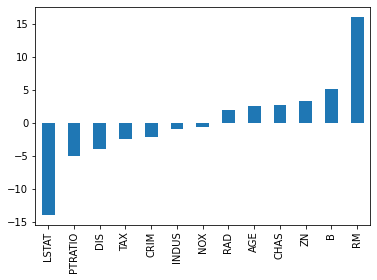

In [78]:
from sklearn.metrics import mean_squared_error
pred=sgdr.predict(X_test)
print('MSE TEST:',mean_squared_error(Y_test,pred))
print('MSE TRAIN:',mean_squared_error(Y_train,sgdr.predict(x_norm)))
coef=pd.Series(sgdr.coef_,x_train.columns).sort_values()
coef.plot(kind='bar')

MSE TEST: 25.6126656854151
MSE TRAIN: 17.98376284388487


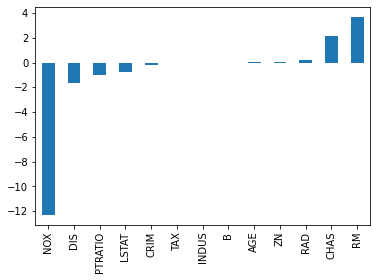

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print('MSE TEST:',mean_squared_error(Y_test,pred))
print('MSE TRAIN:',mean_squared_error(Y_train,model.predict(X_train)))
coef=pd.Series(model.coef_,x_train.columns).sort_values()
coef.plot(kind='bar')